In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')
import train as t

### Dataframe info

#### Loading a processed file

In [3]:
file = 'E0_seasons_5_to_23'
seasons = pd.read_csv(f'../data/processed/{file}.csv')
seasons.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,A_gd_5,H_eff_5,A_eff_5,HST_avg_5,AST_avg_5,target,H_status,A_status,H_H2H,A_H2H
0,E0,13/08/05,Aston Villa,Bolton,2,2,D,2,2,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
1,E0,13/08/05,Everton,Man United,0,2,A,0,1,A,...,NaN,NaN,NaN,0.0,0.0,2,NaN,NaN,NaN,NaN
2,E0,13/08/05,Fulham,Birmingham,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
3,E0,13/08/05,Man City,West Brom,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
4,E0,13/08/05,Middlesbrough,Liverpool,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN


##### Dataframe shape before cleaning

In [4]:
seasons.shape

(6840, 31)

#### Columns dtypes

In [5]:
seasons.dtypes

Div            object
Date           object
HomeTeam       object
AwayTeam       object
FTHG            int64
FTAG            int64
FTR            object
HTHG            int64
HTAG            int64
HTR            object
HS              int64
AS              int64
HST             int64
AST             int64
HY              int64
AY              int64
HR              int64
AR              int64
HPTS_avg_5    float64
APTS_avg_5    float64
H_gd_5        float64
A_gd_5        float64
H_eff_5       float64
A_eff_5       float64
HST_avg_5     float64
AST_avg_5     float64
target          int64
H_status      float64
A_status      float64
H_H2H         float64
A_H2H         float64
dtype: object

#### Cleaning data

In [6]:
t.clean_data(seasons)

#### Seasons shape (number of matches, columns)

In [7]:
seasons.shape

(5388, 31)

#### Features

In [8]:
features = ['H_status', 'A_status', 'HPTS_avg_5', 'APTS_avg_5', 'H_gd_5', 'A_gd_5', 'H_eff_5', 'A_eff_5', 'HST_avg_5', 'AST_avg_5', 'H_H2H', 'A_H2H']
seasons[features]

,H_status,A_status,HPTS_avg_5,APTS_avg_5,H_gd_5,A_gd_5,H_eff_5,A_eff_5,HST_avg_5,AST_avg_5,H_H2H,A_H2H
0,1.91,1.26,3.0,1.0,1.0,0.0,0.07,0.25,14.0,4.0,1.50,1.00
1,1.31,0.79,3.0,0.0,2.0,-1.0,0.38,0.00,8.0,4.0,2.00,0.50
2,1.52,1.31,0.0,0.0,-1.0,-4.0,0.40,0.00,5.0,8.0,1.67,1.17
3,0.00,1.13,3.0,0.0,1.0,-1.0,0.33,0.11,6.0,9.0,0.00,1.13
4,1.17,0.00,3.0,0.0,1.0,-2.0,0.20,0.50,10.0,2.0,1.17,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5383,1.29,0.89,0.8,1.8,-7.0,-2.0,0.15,0.28,5.4,3.6,0.00,3.00
5384,1.28,1.68,1.0,0.4,-8.0,-7.0,0.30,0.53,4.6,3.4,0.75,2.25
5385,1.58,1.40,0.8,1.2,-4.0,-1.0,0.19,0.32,5.2,5.0,1.17,1.67
5386,1.74,0.74,3.0,1.2,9.0,1.0,0.26,0.38,7.6,3.2,2.00,0.50


## Predictions

In [9]:
years = [i for i in range(20, 23)]

premier_league = seasons
la_liga = pd.read_csv(f'../data/processed/SP1_seasons_5_to_23.csv')
serie_a = pd.read_csv(f'../data/processed/I1_seasons_5_to_23.csv')
ligue_1 = pd.read_csv(f'../data/processed/F1_seasons_5_to_23.csv')

leagues = [premier_league, la_liga, serie_a, ligue_1]

for league in leagues:
    t.clean_data(league)

In [10]:
season_start_year = 19
X_train, X_test, y_train, y_test = t.my_train_test_split(premier_league, season_start_year, features)

In [11]:
X_test.head()

,H_status,A_status,HPTS_avg_5,APTS_avg_5,H_gd_5,A_gd_5,H_eff_5,A_eff_5,HST_avg_5,AST_avg_5,H_H2H,A_H2H
0,-1.903185,0.225426,-2.183112,-0.227470,-0.493239,0.302671,-1.503513,-2.210131,1.554845,-0.634469,-1.440680,0.287767
1,-1.903185,1.141911,1.954327,-1.629201,0.136428,-0.594132,0.459962,-2.210131,2.214446,1.903690,-1.440680,1.034190
2,-0.424983,-0.336291,-0.803966,-1.629201,-0.283350,-0.369931,-0.603587,-2.210131,-0.423959,-0.634469,-0.534423,0.360002
3,0.890617,-0.158907,1.954327,-1.629201,0.556206,0.078470,3.896043,-2.210131,0.235642,0.000071,1.785595,-1.241195
4,-1.903185,-0.055433,1.954327,-0.227470,-0.073461,0.302671,0.050905,0.182684,-1.083560,-0.634469,-1.440680,0.059025


### Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(
    multi_class='ovr',
    C=0.07,
    penalty='elasticnet',
    max_iter=400,
    l1_ratio=0.77777,
    solver='saga'
)

lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)

accuracy = np.round(accuracy_score(y_test, y_pred_lr), 3)

print(f"Number of (test) matches: {y_test.shape[0]}")
print(f"Dokładność modelu treningowego: {lr_clf.score(X_train, y_train):.3f}")
print(f'Dokładność modelu testowego: {accuracy}')

Number of (test) matches: 360
Dokładność modelu treningowego: 0.526
Dokładność modelu testowego: 0.525


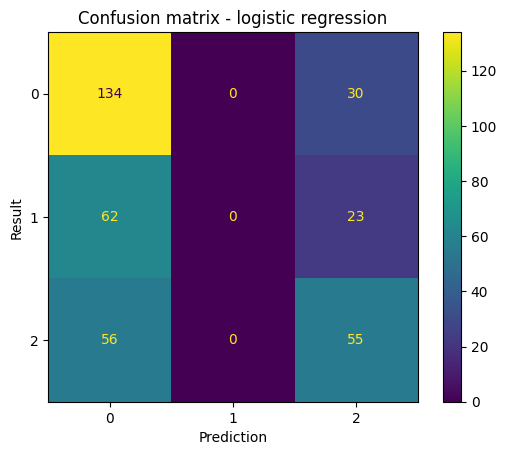

In [13]:
t.plot_confustion_matrix(y_test, y_pred_lr, lr_clf, 'logistic regression')

##### Prediction results from season 2020/21 to 2022/23

In [14]:
t.plot_leagues_predictions(leagues, years, features, lr_clf)

Premier League          La Liga          Serie A          Ligue 1         
          Season Accuracy  Season Accuracy  Season Accuracy  Season Accuracy
0          20/21    0.475   20/21    0.513   20/21    0.537   20/21    0.469
1          21/22    0.511   21/22    0.528   21/22    0.494   21/22    0.467
2          22/23    0.517   22/23    0.555   22/23    0.506   22/23    0.499

### Random forest

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid_rf, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')
random_search.fit(X_train, y_train)

print("Najlepsze parametry: ", random_search.best_params_)

Najlepsze parametry:  {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'log_loss', 'bootstrap': False}


In [16]:
rf_clf = RandomForestClassifier(
    n_estimators=480,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=2,
    criterion='log_loss',
    bootstrap=True
)

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

accuracy = np.round(accuracy_score(y_test, y_pred_rf), 3)

print(f"Number of (test) matches: {y_test.shape[0]}")
print(f"Dokładność modelu treningowego: {rf_clf.score(X_train, y_train):.3f}")
print(f'Dokładność modelu testowego: {accuracy}')

Number of (test) matches: 360
Dokładność modelu treningowego: 0.538
Dokładność modelu testowego: 0.506


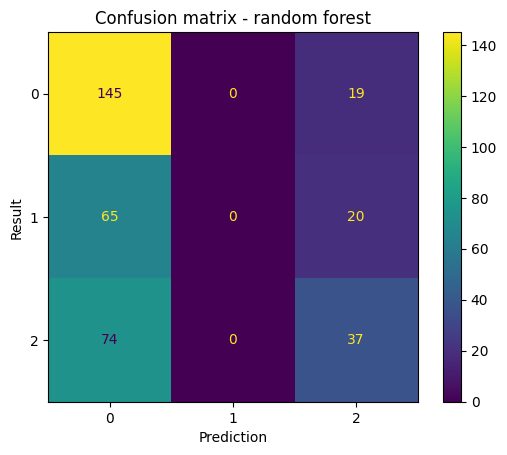

In [17]:
t.plot_confustion_matrix(y_test, y_pred_rf, rf_clf, 'random forest')

In [18]:
t.plot_leagues_predictions(leagues, years, features, rf_clf)

Premier League          La Liga          Serie A          Ligue 1         
          Season Accuracy  Season Accuracy  Season Accuracy  Season Accuracy
0          20/21    0.450   20/21    0.487   20/21    0.507   20/21    0.413
1          21/22    0.497   21/22    0.506   21/22    0.508   21/22    0.464
2          22/23    0.514   22/23    0.544   22/23    0.494   22/23    0.499

### Gradient boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()

param_grid_gb = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.8, 0.9, 1.0],
}

random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_grid_gb, cv=5, random_state=42 ,n_jobs=-1, scoring='accuracy')
random_search.fit(X_train, y_train)

print("Najlepsze parametry: ", random_search.best_params_)

Najlepsze parametry:  {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.01}


In [20]:
gb_clf = GradientBoostingClassifier(
    subsample=0.9,
    n_estimators=300,
    min_samples_split=4,
    min_samples_leaf=4,
    max_features=None,
    max_depth=3,
    learning_rate=0.01
)

gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

accuracy = np.round(accuracy_score(y_test, y_pred_gb), 3)

print(f"Number of (test) matches: {y_test.shape[0]}")
print(f"Dokładność modelu treningowego: {gb_clf.score(X_train, y_train):.3f}")
print(f'Dokładność modelu testowego: {accuracy}')

Number of (test) matches: 360
Dokładność modelu treningowego: 0.553
Dokładność modelu testowego: 0.517


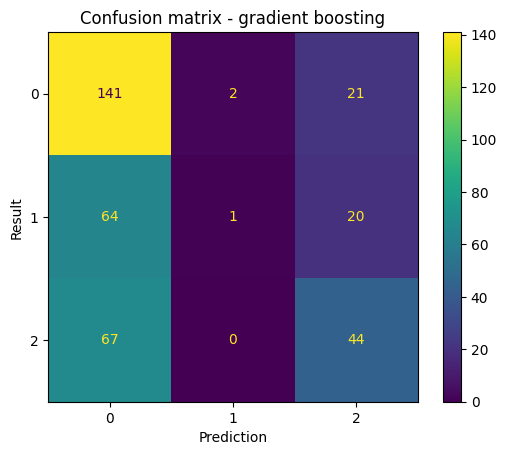

In [21]:
t.plot_confustion_matrix(y_test, y_pred_gb, gb_clf, 'gradient boosting')

In [22]:
t.plot_leagues_predictions(leagues, years, features, gb_clf)

Premier League          La Liga          Serie A          Ligue 1         
          Season Accuracy  Season Accuracy  Season Accuracy  Season Accuracy
0          20/21    0.466   20/21    0.510   20/21    0.518   20/21    0.472
1          21/22    0.511   21/22    0.500   21/22    0.506   21/22    0.478
2          22/23    0.525   22/23    0.552   22/23    0.497   22/23    0.493

### SVM

In [23]:
from sklearn.svm import SVC

svm_clf = SVC()

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
}

random_search = RandomizedSearchCV(estimator=svm_clf, param_distributions=param_grid_svm, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')
random_search.fit(X_train, y_train)

print("Najlepsze parametry: ", random_search.best_params_)

Najlepsze parametry:  {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}


In [24]:
svm_clf = SVC(
    C=1,
    gamma=0.01,
    kernel='rbf'
)

svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

accuracy = np.round(accuracy_score(y_test, y_pred_svm), 3)

print(f"Number of (test) matches: {y_test.shape[0]}")
print(f"Dokładność modelu treningowego: {svm_clf.score(X_train, y_train):.3f}")
print(f'Dokładność modelu testowego: {accuracy}')

Number of (test) matches: 360
Dokładność modelu treningowego: 0.531
Dokładność modelu testowego: 0.517


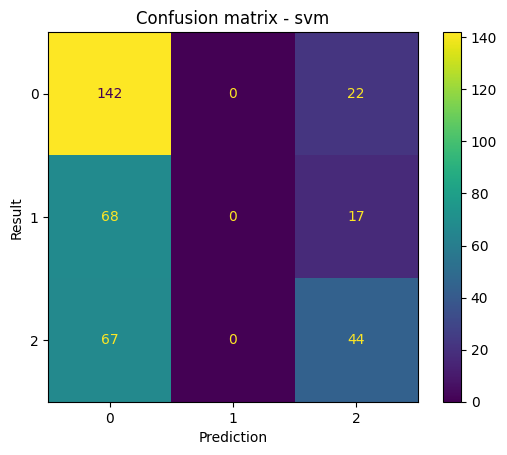

In [25]:
t.plot_confustion_matrix(y_test, y_pred_svm, svm_clf, 'svm')

In [26]:
t.plot_leagues_predictions(leagues, years, features, svm_clf)

Premier League          La Liga          Serie A          Ligue 1         
          Season Accuracy  Season Accuracy  Season Accuracy  Season Accuracy
0          20/21    0.478   20/21    0.482   20/21    0.529   20/21    0.436
1          21/22    0.519   21/22    0.497   21/22    0.500   21/22    0.478
2          22/23    0.522   22/23    0.538   22/23    0.497   22/23    0.501